In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("cars24-car-price-cleaned.csv")

In [4]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [5]:
df.shape

(19820, 18)

In [6]:
df['make'].nunique(), df['model'].nunique()

(41, 3233)

In [7]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')

In [8]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [9]:
X = df.drop("selling_price", axis=1)
y = df["selling_price"]

In [10]:
X.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [11]:
y.head()

0    1.20
1    5.50
2    2.15
3    2.26
4    5.70
Name: selling_price, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape

((15856, 17), (3964, 17))

In [14]:
y_train.shape

(15856,)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_new = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_new, columns = X_train.columns)

In [16]:
X_train.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-0.489414,0.502456,0.243228,0.240112,0.120997,0.489414,-0.284819,-0.599662,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
1,-1.429050,0.900732,-0.799809,1.011304,1.854161,1.429050,2.975929,0.929139,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,-2.012782,0.443384,-0.423776
2,1.076647,0.366270,1.841617,-0.439780,-0.541816,-1.076647,-0.521072,0.064971,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
3,1.389859,-0.972890,1.013255,-0.534965,-0.317892,-1.389859,-0.604885,-0.206702,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
4,-2.055474,1.183386,-1.399497,0.630564,0.712154,2.055474,-0.163433,-0.799491,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776


In [17]:
X_new = scaler.transform(X_test) # only transform. no fit_transform
X_test = pd.DataFrame(X_new, columns = X_test.columns)

In [18]:
X_test.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.763435,0.502456,0.499903,-0.026017,-0.299979,-0.763435,-0.542630,-0.456837,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
1,0.137011,0.082550,0.149891,0.045857,-0.210409,-0.137011,-0.284819,-0.330968,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
2,0.450223,0.307257,1.820617,0.045857,0.009035,-0.450223,-0.163433,-0.206702,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
3,0.450223,-0.623074,-0.186121,-0.534965,-0.212649,-0.450223,-0.163433,-0.176406,-0.799289,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
4,-0.802626,0.048503,0.331897,-0.925417,-0.696322,0.802626,-0.521072,-0.927358,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776


In [19]:
def predict(X, weights):
    
    return np.dot(X,weights)

In [20]:
def loss(X, y, weights):
    
    y_hat = predict(X, weights)
    err = np.mean((y - y_hat)**2)

    return err

In [21]:
def gradients(X, y, weights):

    y_hat = predict(X, weights)
    grads = 2*np.dot(X.T, y_hat - y)/len(y)

    return grads

In [22]:
def gradient_descent(X, y, learning_rate=0.1, n_itrs=100):

    n, d = X.shape
    error_list = []

    # Step 1: Initialization
    w = np.random.rand(d)

    for _ in range(n_itrs):

        e = loss(X, y, w)
        error_list.append(e)
        
        # Step 2: Calculate derivatives
        dW = gradients(X, y, w)

        # Step 3: Update equation
        w = w - learning_rate*dW

    return w, error_list

In [23]:
def r2_score(y_true, y_pred):
    numerator = np.sum((y_true - y_pred)**2)
    denominator = np.sum((y_true - y_true.mean())**2)
    score = 1 - (numerator/denominator)
    return score

In [24]:
W_best, error_list = gradient_descent(X_train, y_train)

In [25]:
W_best

array([ 0.67304938, -0.14579014, -0.15053104,  0.06207536,  0.20381199,
        0.07042863,  0.37019597,  3.78232164, -0.06370781, -0.01390922,
        0.37808485,  0.05405741,  0.0554417 ,  0.20671815, -0.06882982,
        0.26598084,  0.27250043])

In [26]:
error_list[-5:]

[np.float64(44.58349733421919),
 np.float64(44.58266655731586),
 np.float64(44.58186384589736),
 np.float64(44.58108803636857),
 np.float64(44.58033801880368)]

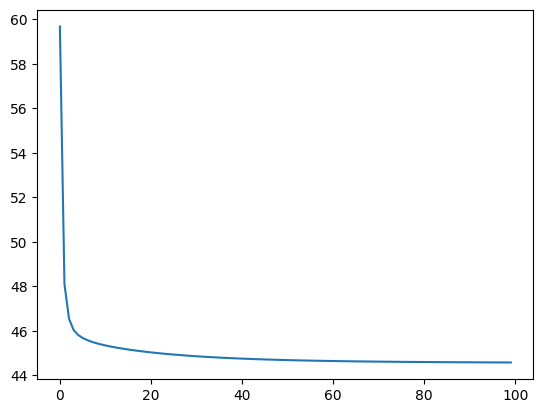

In [27]:
plt.plot(error_list)

In [28]:
y_train_pred = predict(X_train, W_best)
y_train_pred[:10]

array([-2.67053104,  4.55617733,  0.30155961, -0.55129225, -4.37510099,
        0.95082708, -1.65394562, -0.5339046 , -7.38473108, -4.19269673])

In [29]:
r2_score(y_train, y_train_pred)

np.float64(-0.9111978514208274)

In [30]:
# Because w0 is not considered

# Incorporated w0

In [31]:
x0 = pd.DataFrame([1]*len(X_train), columns = ['x0'])

In [32]:
# Incorporated w0
X_train_new = pd.concat([x0, X_train], axis=1)
X_train_new.head()

,x0,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1,-0.489414,0.502456,0.243228,0.240112,0.120997,0.489414,-0.284819,-0.599662,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
1,1,-1.429050,0.900732,-0.799809,1.011304,1.854161,1.429050,2.975929,0.929139,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,-2.012782,0.443384,-0.423776
2,1,1.076647,0.366270,1.841617,-0.439780,-0.541816,-1.076647,-0.521072,0.064971,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
3,1,1.389859,-0.972890,1.013255,-0.534965,-0.317892,-1.389859,-0.604885,-0.206702,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
4,1,-2.055474,1.183386,-1.399497,0.630564,0.712154,2.055474,-0.163433,-0.799491,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776


In [33]:
W_best, error_list = gradient_descent(X_train_new, y_train)

In [34]:
W_best.shape

(18,)

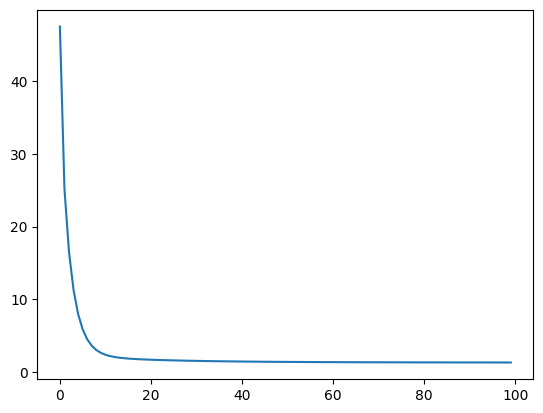

In [35]:
plt.plot(error_list)

In [36]:
error_list[-5:]

[np.float64(1.2969758331157244),
 np.float64(1.2964127295898058),
 np.float64(1.2958695761536871),
 np.float64(1.2953454847794008),
 np.float64(1.2948396112302099)]

In [37]:
y_train_pred = predict(X_train_new, W_best)
y_train_pred[:10]

array([ 3.89028739, 11.03731761,  6.9122269 ,  6.04799592,  2.18559102,
        7.4773329 ,  4.89233757,  6.05963037, -0.79712812,  2.39602398])

In [38]:
r2_score(y_train, y_train_pred)

np.float64(0.9445091379110855)

In [40]:
# Adjusted R2 Score
n,d = X_train.shape

r2 = r2_score(y_train, y_train_pred)

adj_r2 = 1 - ((1-r2)*(n-1)/(n-d-1))
adj_r2

np.float64(0.9444495758037795)

# Statsmodel

In [43]:
X=df.drop('selling_price', axis=1)
y=df[['selling_price']]

In [42]:
y.head()

0    1.20
1    5.50
2    2.15
3    2.26
4    5.70
Name: selling_price, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
y_train = np.array(y_train)

In [45]:
X_train.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
3443,2013.0,67000,15.60,1497.0,116.30,10.0,5.979902,4.364286,0,0,0,0,0,1,0,1,0
16090,2017.0,35000,20.51,998.0,67.04,6.0,4.684721,3.808235,1,0,0,0,0,1,1,1,0
11070,2016.0,130000,21.58,1248.0,88.70,7.0,4.381194,4.450000,1,0,1,0,0,0,0,1,0
19214,2018.0,43266,18.16,1196.0,86.80,5.0,5.858258,5.105000,0,0,0,0,0,1,1,1,0
17843,2011.0,48000,16.20,1493.0,110.00,12.0,5.458819,3.250000,1,0,1,0,0,0,1,1,0


In [48]:
import statsmodels.api as sm

In [50]:
X_sm = sm.add_constant(X_train)   # Statmodels default is without intercept, to add intercept we need to add constant.

model = sm.OLS(y_train, X_sm)
results = model.fit()

# statistical summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.701e+04
Date:                Wed, 27 Aug 2025   Prob (F-statistic):               0.00
Time:                        21:12:36   Log-Likelihood:                -24523.
No. Observations:               15856   AIC:                         4.908e+04
Df Residuals:                   15839   BIC:                         4.921e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -8.84e-05    1.9e-06  

In [51]:
results.predict(X_sm)

3443      4.556349
16090     4.124025
11070     4.754339
19214     5.810158
17843     3.243950
           ...    
1099     18.137057
18898     4.712612
11798     8.700178
6637     17.853014
2575      6.261600
Length: 15856, dtype: float64

# Assumptions

## Multicollinearity

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_t = pd.DataFrame(X_train, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,year,395.89
13,Petrol,18.29
10,Diesel,17.29
5,age,15.03
16,>5,13.04
15,5,11.75
3,engine,6.30
7,model,6.16
4,max_power,5.02
6,make,3.33


In [55]:
X_t.drop(columns=['year'], inplace=True)

X2_sm = sm.add_constant(X_t)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(list(y_train), X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.701e+04
Date:                Sun, 31 Aug 2025   Prob (F-statistic):               0.00
Time:                        00:26:47   Log-Likelihood:                -24523.
No. Observations:               15856   AIC:                         4.908e+04
Df Residuals:                   15839   BIC:                         4.921e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.9505      0.180  

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,5,51.79
2,engine,50.07
1,mileage,29.88
9,Diesel,29.25
3,max_power,29.03
12,Petrol,24.59
6,model,17.83
5,make,14.24
4,age,12.94
15,>5,11.17


In [58]:
X_t.drop(columns=['5'], inplace=True)

In [59]:
vif = pd.DataFrame()

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,engine,47.75
3,max_power,28.80
9,Diesel,26.08
1,mileage,22.07
12,Petrol,19.62
6,model,17.61
5,make,14.23
4,age,12.70
13,Manual,8.65
0,km_driven,2.60


In [60]:
X_t.drop(columns=['engine'], inplace=True)

In [61]:
vif = pd.DataFrame()

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Diesel,23.39
1,mileage,21.55
2,max_power,18.36
11,Petrol,18.33
5,model,17.44
4,make,14.06
3,age,11.96
12,Manual,8.47
0,km_driven,2.57
6,Individual,1.78


In [62]:
X_t.drop(columns=['Diesel'], inplace=True)

In [63]:
vif = pd.DataFrame()

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,max_power,17.68
5,model,16.74
4,make,14.05
1,mileage,13.27
3,age,10.56
11,Manual,8.14
0,km_driven,2.56
10,Petrol,2.17
6,Individual,1.76
12,>5,1.64


In [65]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_t, y_train)

model.score(X_t, y_train)

0.9448675810554413

In [66]:
# We observe that the R2 score doesn't change much and VIF is suggesting to drop important features like max_power. 
# We'll stop here. VIF gives an idea about multicollinear features but shouldn't be trusted blindly while dropping features.

## Normality of Residuals

In [68]:
y_hat = model.predict(X_t)
errs = y_train - y_hat

<Axes: ylabel='Count'>

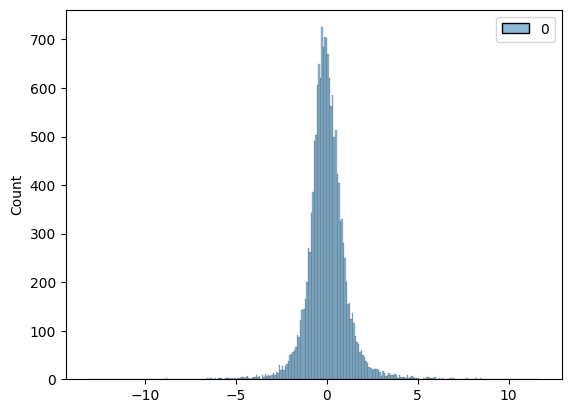

In [70]:
import seaborn as sns
sns.histplot(errs)

In [71]:
from scipy import stats
res = stats.shapiro(errs) # Shapiro–Wilk test to check normality (In the range 0-1)
res.statistic

np.float64(0.890054203504088)

## Heteroskedasticity

Text(0, 0.5, 'Residuals')

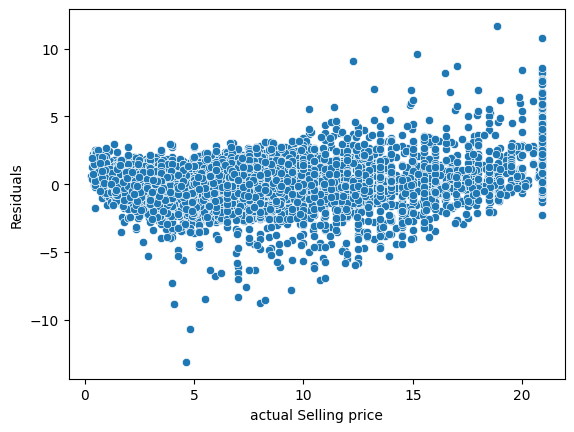

In [72]:
sns.scatterplot(x = y_train.reshape(-1,), y = errs.reshape(-1,));
plt.xlabel("actual Selling price")
plt.ylabel("Residuals")

In [73]:
# No heteroskedasticity is observed